In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

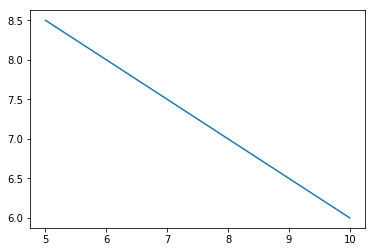

In [4]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]
plt.plot(car_prices,units_sold) #traza la linea

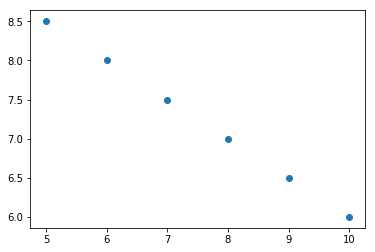

In [5]:
plt.scatter(car_prices,units_sold) #traza los puntos

In [6]:
prices_array = np.array(car_prices)
units_array = np.array(units_sold)
print(prices_array.shape)
print(units_array.shape)

(6,)
(6,)


In [7]:
# le añadimos una dimension más
prices_array = prices_array.reshape(-1,1)
units_array = units_array.reshape(-1,1)
print(prices_array.shape)
print(units_array.shape)

(6, 1)
(6, 1)


### PAUSA: Gráficos de computación y diferenciación automática
*Revisar el notebook de Entendiendo los Gráficos de computación y diferenciación automática* 

El concepto de un gráfico de cálculo es esencial para una programación eficiente de deep learning, ya que le permite no tener que escribir los gradientes de propagación hacia atrás usted mismo. Un gráfico de cálculo es simplemente una especificación de cómo se combinan sus datos para proporcionarle la salida. Dado que el gráfico especifica totalmente qué parámetros estaban involucrados con qué operaciones, contiene suficiente información para calcular derivados. Esto probablemente suene vago, así que veamos qué está sucediendo con el indicador fundamental **require_grad**.

Primero, piense desde la perspectiva de los programadores. ¿Qué se almacena en la antorcha. Objetos tensoriales que estábamos creando arriba? Obviamente los datos y la forma, y tal vez algunas otras cosas. Pero cuando agregamos dos tensores juntos, obtuvimos un tensor de salida. Todo lo que este tensor de salida sabe es sus datos y su forma. No tiene idea de que era la suma de otros dos tensores (podría haberse leído de un archivo, podría ser el resultado de alguna otra operación, etc.)

Si **require_grad = True**, el objeto Tensor realiza un seguimiento de cómo se creó. Vamos a verlo en acción.

In [8]:
#requires_grad
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
'''
.requires_grad_(True) vs ._requires_grad = True
Ambos son igualmente preferibles. tensor.requires_grad_ () 
tiene el argumento booleano predeterminado establecido en True, 
mientras que con tensor.requires_grad = True tiene que establecer 
explícitamente el valor.
'''
units = torch.from_numpy(units_array).float()

prices,prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0206, grad_fn=<MseLossBackward>)


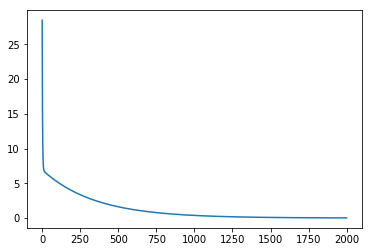

In [11]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.015)

losses = []
iterations = 2000
for i in range(iterations):
    pred = model(prices)
    loss = loss_function(pred,units)
    losses.append(loss.data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(loss)
plt.plot(range(iterations),losses)

In [14]:
x = torch.tensor([[4.0]])

In [15]:
print(model(x))

tensor([[8.6822]], grad_fn=<AddmmBackward>)
